In [15]:
import imblearn

In [16]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [17]:
data = pd.read_excel("Logistic regression.xlsx")

In [18]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [19]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [20]:
data.drop(["ID","ZIP Code"],axis =1 ,inplace =True) # Dropping the unwanted columns from the dataset

In [21]:
data.columns # Lsiting out all the columns of the dataset

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [22]:
data.isna().sum() # No Null values are there in the dataset

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

This is the boxplot for the following variable Age 



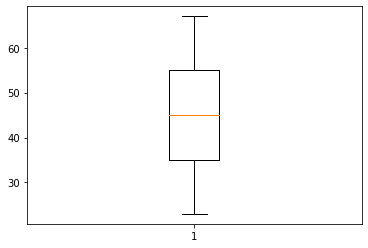

This is the boxplot for the following variable Experience 



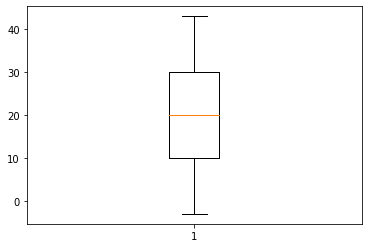

This is the boxplot for the following variable Income 



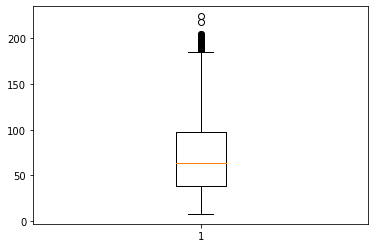

This is the boxplot for the following variable Family 



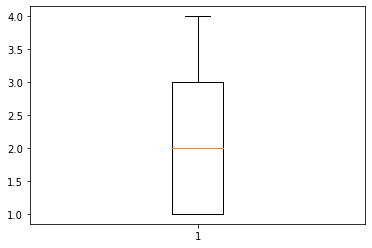

This is the boxplot for the following variable CCAvg 



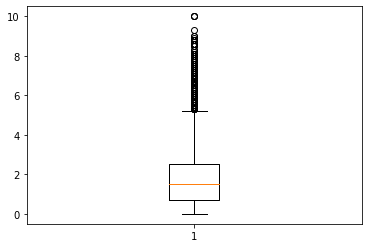

This is the boxplot for the following variable Education 



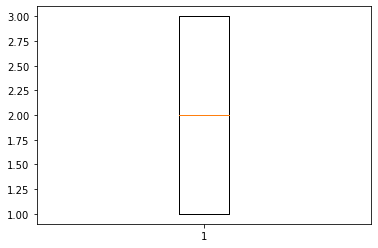

This is the boxplot for the following variable Mortgage 



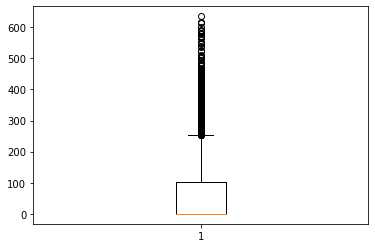

This is the boxplot for the following variable Personal Loan 



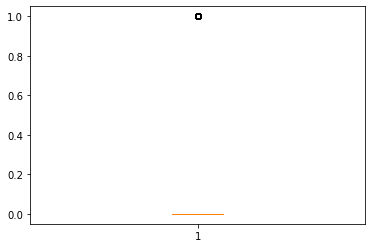

This is the boxplot for the following variable Securities Account 



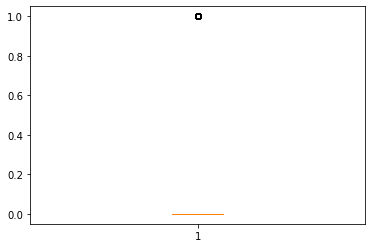

This is the boxplot for the following variable CD Account 



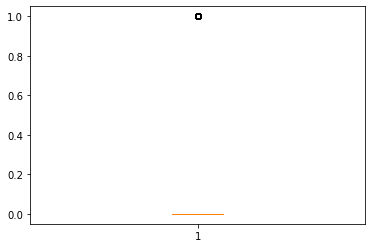

This is the boxplot for the following variable Online 



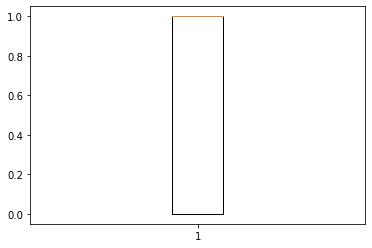

This is the boxplot for the following variable CreditCard 



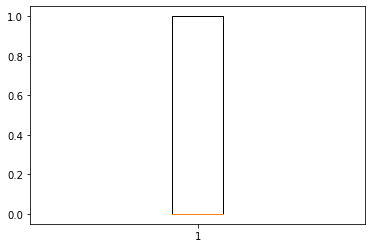

In [23]:
def outlier(data):
    for i in data.columns:
        print("This is the boxplot for the following variable", i ,"\n")
        plt.boxplot(data[i])
        plt.show()
outlier(data)

From the above Boxplot we can say that the data is perfect and there has been no outlier in the daataset

In [24]:
data.drop_duplicates(inplace=True) #Dropped all the duplicates value if there exist any!

In [25]:
yes = data[data["Personal Loan"] == 1]
no = data[data["Personal Loan"] != 1]
print(len(yes))
print(len(no))
# the given data is too much biased we need to use the smote techinque to make the data comparable

480
4507


In [31]:
from imblearn.over_sampling import SMOTE

In [32]:
x = data.drop("Personal Loan",axis = 1)
y = data["Personal Loan"]

In [33]:
from sklearn.model_selection import train_test_split
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
columns = X_train.columns

In [34]:
os_data_X,os_data_y=os.fit_resample(X_train, y_train.ravel())
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  6270
Number of no subscription in oversampled data 3135
Number of subscription 3135
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [38]:
# Before building the model since we dont have any categorical value we are not ddoing dummies variable part

# But we will do the rfe wala part

In [39]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [40]:
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[ True  True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1]


In [41]:
cols = ["CCAvg",'Securities Account', 'CD Account', 'Online', 'CreditCard']
os_data_X = os_data_X[cols]

In [48]:
import statsmodels.api as sm
x1 = sm.add_constant(os_data_X)
logit_model=sm.Logit(os_data_y,x1)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.430880
         Iterations 7
                          Results: Logit
Model:               Logit             Pseudo R-squared:  0.378    
Dependent Variable:  y                 AIC:               5415.2335
Date:                2021-06-14 18:52  BIC:               5455.6947
No. Observations:    6270              Log-Likelihood:    -2701.6  
Df Model:            5                 LL-Null:           -4346.0  
Df Residuals:        6264              LLR p-value:       0.0000   
Converged:           1.0000            Scale:             1.0000   
No. Iterations:      7.0000                                        
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
const              -1.2180   0.0709 -17.1903 0.0000 -1.3569 -1.0791
CCAvg               0.7499   0.0218  34.4

The most siginificant value for the above model are income family education securities account cd account online creditcard

the least signifiant cvalue are age experience mortage

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(os_data_X, os_data_y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [58]:
os_data_X

,CCAvg,Securities Account,CD Account,Online,CreditCard
0,2.000000,0,0,1,1
1,1.700000,0,0,1,0
2,1.300000,0,0,0,1
3,6.000000,0,0,1,1
4,1.500000,0,0,1,0
...,...,...,...,...,...
6265,4.641446,0,0,0,0
6266,0.421715,0,0,1,0
6267,3.490183,0,0,0,0
6268,3.779589,0,0,0,1


In [60]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.80


In [61]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[780 188]
 [181 732]]


In [62]:
from sklearn.metrics import accuracy_score

y_pred = logreg.predict(X_test)

score =accuracy_score(y_test,y_pred)
score

0.8038277511961722